# Aerosol influence on ground snow properties during SAIL



<img src="images/saillogo.png" width=250 alt="SAIL-Logo"></img>

## Group Members
Yan Xie, Zhenli Lai (Joy), Maiqi Zhang, Jessica Gasparik, Hayden Webb, Ryan Poland, Adrian Cortes

---

## Overview
The Colorado River provides water resources to the local community and ecosystems, 15 million jobs, and hydroelectric energy. However, the Colorado River has been under extreme stress with decreases in stream and river discharge in the basin. Many studies investigate reasons behind the changing in river conditions. On September 1, 2021 an ARM field campaign known as Surface Atmosphere Integrated Field Laboratory (SAIL) was launched to advance knowledge of atmospheric processes at high altitude terrain. The field campaign extended through June 15, 2023 with the ARM Mobile Facility (AMF2) deployed to Gunnison, CO. Measurements in precipitation, atmospheric thermodynamic state, aerosols and many more were collected over the period of study.  

Our analysis utilizes SAIL data to observe changes in snow properties due to high aerosol loading events. The analysis considers a high black carbon event on January 25th, 2022 caused by wildfire smoke advecting over the Colorado site from California. The second event considers a known high dust loading event on April 3rd, 2023. These events are validated using HYSPLIT simulations. We analyze the aerosol present using data from the ARM2 including SMPS, SP2, OPC, Lidar. This project evaluates changes in albedo, longwave radiation, and snowpack due to high aerosol loading events. The events are compared to WRF simulations for the SAIL campaign, which do not include aerosol. This serves to validate our findings regarding aerosol influence on the surface snow properties. This work is motivated by understanding the aerosol influence on the local hydrologic cycle.

## Science Question(s)
- Compare snowpack and surface radiative properties for two aerosol events (high dust and high black carbon (BC)) and one control case.
- Dates under consideration: January 2nd 2022 (control), January 25th 2022 (black carbon event), April 3rd 2023 (dust event). We will consider 5 days after each event.
- How do these peaks correlate with changes surface albedo, radiative fluxes & snowpack?
* Quantify errors in WRF simulations which do not consider aerosol. Observe differences in surface albedo, radiative fluxes and snowpack depth.
* Motivation: Observe the impact of high aerosol loading on the local hydrologic cycle.

## Project Scope (what does success look like)?
* **Aerosol (observations):** plot total number concentration, plot black carbon and dust mixing ratios (or proxy variable)
* **Surface snow impact (observations):** Plot changes in snowpack, surface albedo, and radiative fluxes surrounding high aerosol events
* **Model comparison:** WRF simulations at the same dates, quantify errors in snowpack, surface albedo, and radiative fluxes. Errors = observed - modeled.

## Hypothesis (or Hypotheses)
- Decreases in local surface albedo will correlate with high aerosol loading events. 
- Increased surface heating results in snowpack depth decrease following high aerosol loading events.
- WRF does not implement aerosols in simulations; therefore, could mis predict the snow radiation fluxes following aerosol events.

## Datasets
* **SP2 measurement** - black carbon
* **Lidar** - dust
* **SMPS** - total number concentration&size distribution
* **HYSPLIT**-back trajectories
* **SEBS measurement** - surface shortwave radiation fluxes
* **MET measurement** - surface temperature; precipitation
* **WRF simulation** - surface radiation fluxes; snow depth (?); surface temperature
* **AOP PSAP** - aerosol optical properties (AAE, AE, SSA, Beta Abs, Beta Sca)
* **Weather camera** - snow cover status


---

### Section 1: Identify high-aerosol loading events
copy + paste your notebook here

In [ ]:
# analysis of high aerosol loading during dust event (April 3, 2024)
# read High Spectra Resolution Lidar (HSRL) data using ACT

### code courtesy of Damao Zhang ###

#%matplotlib widget
import ipywidgets as widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd
import os
from datetime import datetime

import act
import xarray as xr

[DOWNLOADING] guchsrlM1.a1.20230403.000000.nc

If you use these data to prepare a publication, please cite:

Holz, R., Garcia, J., Schuman, E., Bambha, R., Ermold, B., Eloranta, E., &
Garcia, J. High Spectral Resolution Lidar (HSRL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1462207



/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


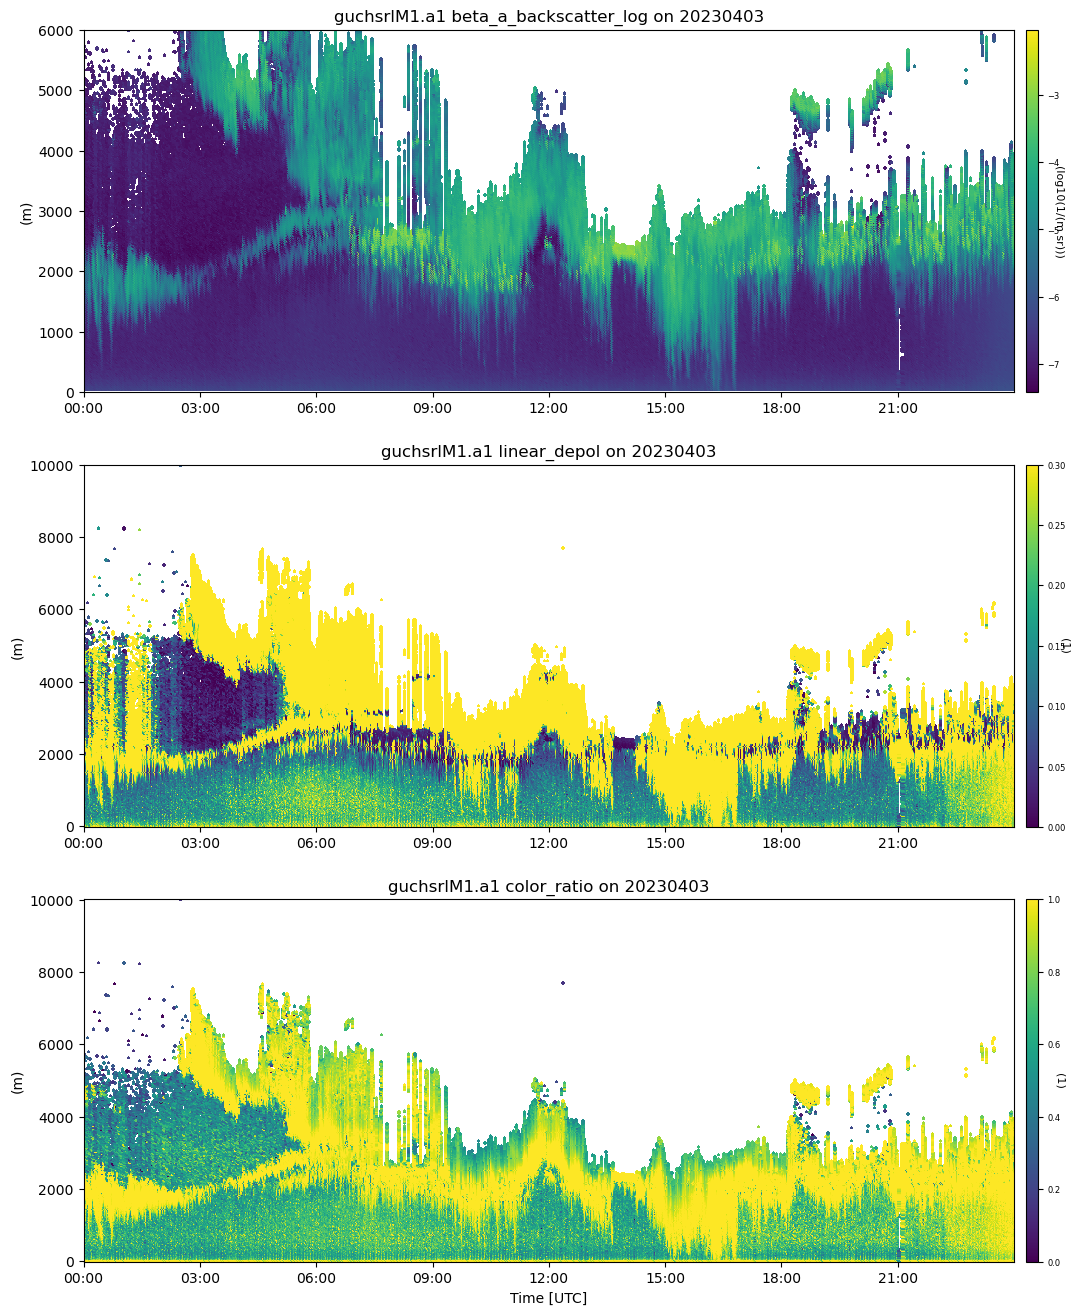

In [51]:
### April 3rd, 2022 ###
# Set your username and token here!
username = 'jgasparik'
token = '61940ef60369b0bb'

# Set the datastream and start/enddates

datastream = 'guchsrlM1.a1'
startdate = '2023-04-3'
enddate = '2023-04-3'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

# compute log of backscatter 
ds['beta_a_backscatter_log'] = np.log10(ds['beta_a_backscatter'])
ds['beta_a_backscatter_log'].attrs['units'] = f"log10({ds['beta_a_backscatter'].attrs['units']})"
ds = ds.where(ds.range <= 10000, drop=True)

mask = ds['particulate_backscatter_signal_to_noise']>=3

#beta_a_backscatter - column backscatter 
variables = ['beta_a_backscatter_log', 'linear_depol', 'color_ratio']

# watch out cloudy pixels
display = act.plotting.TimeSeriesDisplay(ds.where(mask),
                                         subplot_shape=(3,), figsize=(12,16))
display.plot(variables[0], subplot_index=(0,))
display.set_yrng([0, 6000], subplot_index=(0,))

# linear_depol indicates irregular aerosol 
display.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.3)
display.set_yrng([0, 6000], subplot_index=(0,))

# color_ratio an indicator of aerosol particle size. Large aerosol particles have larger color_ratios
display.plot(variables[2], subplot_index=(2,), vmin = 0, vmax = 1)
display.set_yrng([0, 6000], subplot_index=(0,))

plt.show()

### Section 2: Analyze associated environmental conditions
copy + paste your notebook here

### Section 3: Evaluating black carbon & dust concentrations
copy + paste your notebook here

### Section 4: Longwave radiation variations
copy + paste your notebook here

In [1]:
import xarray as xr
import cartopy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


Text(0.5, 1.0, 'Jan 25th - Control')

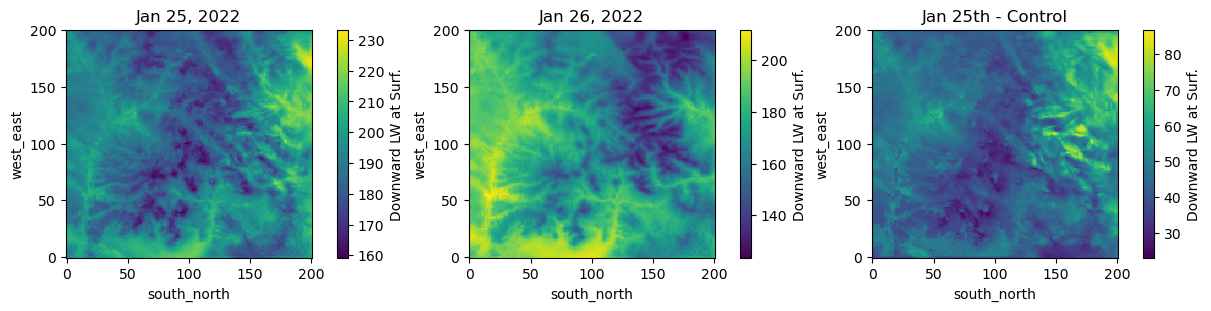

In [5]:
# Plot downward LW radiation at surface
# January 26th had no clouds so this day serves as comparison 
dataset_25 = xr.open_mfdataset('wrf_data/jan_2022/wrfhourly_d03_2022-01-25.nc')
dataset_26 = xr.open_mfdataset('wrf_data/jan_2022/wrfhourly_d03_2022-01-26.nc')
dataset_02 = xr.open_mfdataset('wrf_data/jan_2022/wrfhourly_d03_2022-01-02.nc')
mean_dataset_diff = dataset_25.mean(dim="Time") - dataset_02.mean(dim="Time")

fig = plt.figure(figsize = (12,3),constrained_layout=True)

gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
dataset_25.mean(dim="Time").GLW.plot(x='south_north',y='west_east',cbar_kwargs={'label': r"Downward LW at Surf."})
ax1.set_title('Jan 25, 2022')
ax2 = fig.add_subplot(gs[0, 1])
dataset_26.mean(dim="Time").GLW.plot(x='south_north',y='west_east',cbar_kwargs={'label': r"Downward LW at Surf."})
ax2.set_title('Jan 26, 2022')
ax3 = fig.add_subplot(gs[0, 2])
mean_dataset_diff.GLW.plot(x='south_north',y='west_east',cbar_kwargs={'label': r"Downward LW at Surf."})
ax3.set_title('Jan 25th - Control')

### Section 5: Snow albedo changes in measurements and WRF simulations

#### 5.1.1 Load SEBS surface radiation measurements
SEBS - Surface Energy Balance System

In [18]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [190]:
# Set your username and token 
username = 'yxie'
token = '8bb157033dfd0a5'

# Set the datastream and start/enddates
datastream = 'gucsebsM1.b1'

# Event #1 at January 2, 2022
startdate1 = '2022-01-02'
enddate1 = '2022-01-07'

# Event #2 at January 25, 2022
startdate2 = '2022-01-25'
enddate2 = '2022-01-30'

# Event #3 at April 3, 2023
startdate3 = '2023-04-03'
enddate3 = '2023-04-08'

# We are looking at 5 days after the event
numdate = 6

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result1 = act.discovery.download_arm_data(username, token, datastream, startdate1, enddate1)
result2 = act.discovery.download_arm_data(username, token, datastream, startdate2, enddate2)
result3 = act.discovery.download_arm_data(username, token, datastream, startdate3, enddate3)



[DOWNLOADING] gucsebsM1.b1.20220102.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220103.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220104.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220105.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220106.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220107.000000.cdf

If you use these data to prepare a publication, please cite:

Sullivan, R., Keeler, E., Pal, S., & Kyrouac, J. Surface Energy Balance System
(SEBS). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1984921

[DOWNLOADING] gucsebsM1.b1.20220125.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220126.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220127.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220128.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220129.000000.cdf
[DOWNLOADING] gucsebsM1.b1.20220130.000000.cdf

If you use these data to prepare a publication, please cite:

Sullivan, R., Keeler, E., Pal, S., & Kyrouac, J. Surface Energy Balance System
(SEBS). Atmospheric Radiation Measurement (ARM) User Fac

In [191]:
# Let's read in the data using ACT and check out the data
ds_rad1 = act.io.read_arm_netcdf(result1)
ds_rad2 = act.io.read_arm_netcdf(result2)
ds_rad3 = act.io.read_arm_netcdf(result3)

In [192]:
# Quality Check the data
# Remove the bad data
ds_rad1.clean.cleanup()
#ds_rad = act.qc.arm.add_dqr_to_qc(ds_rad)
ds_rad1.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_rad2.clean.cleanup()
ds_rad2.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

ds_rad3.clean.cleanup()
ds_rad3.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)


#### 5.1.2 Visualize the SEBS albedo measurement

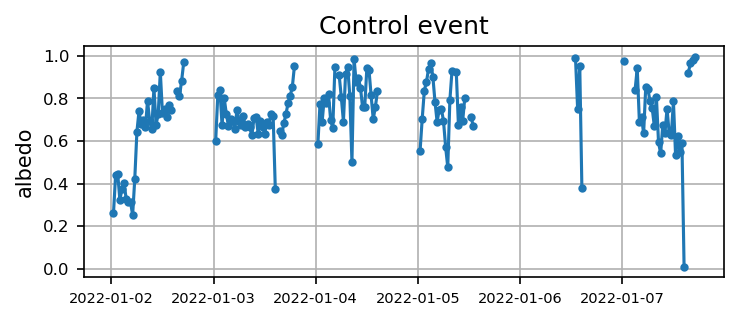

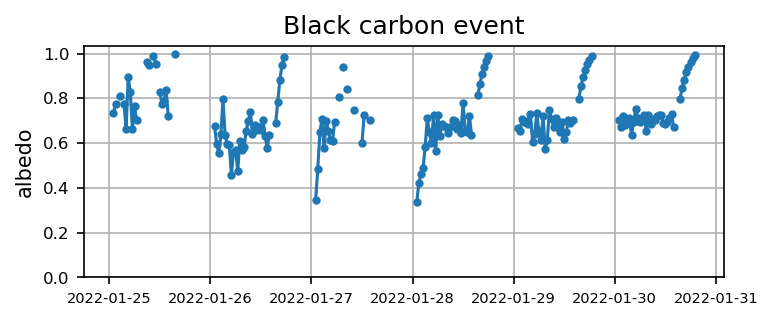

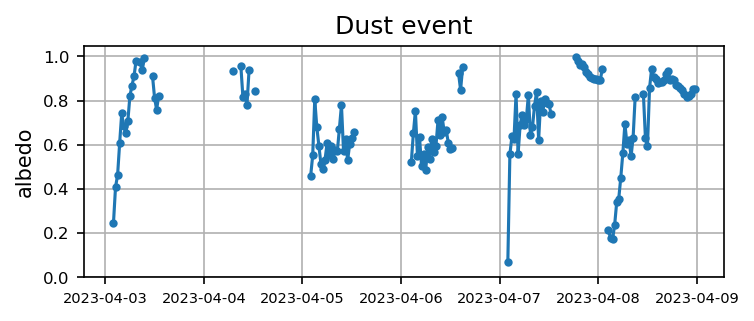

In [224]:
# Visualize the SEBS albedo measurement
plt.figure(figsize=(5.5,2), dpi=150)
plt.plot(ds_rad1['time'], ds_rad1['albedo'], '.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0,1.1,0.2),fontsize=8)
plt.ylabel('albedo')
plt.grid()
plt.title('Control event')
plt.show()

plt.figure(figsize=(5.5,2), dpi=150)
plt.plot(ds_rad2['time'], ds_rad2['albedo'], '.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0,1.1,0.2),fontsize=8)
plt.ylabel('albedo')
plt.grid()
plt.title('Black carbon event')
plt.show()

plt.figure(figsize=(5.5,2), dpi=150)
plt.plot(ds_rad3['time'], ds_rad3['albedo'], '.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0,1.1,0.2),fontsize=8)
plt.ylabel('albedo')
plt.grid()
plt.title('Dust event')
plt.show()


#### 5.1.3 Compute the daily albedo

In [196]:
daily_swdn1 = ds_rad1["down_short_hemisp"].groupby("time.day").mean()
daily_swup1 = ds_rad1["up_short_hemisp"].groupby("time.day").mean()
daily_alb1 = daily_swup1 / daily_swdn1

daily_swdn2 = ds_rad2["down_short_hemisp"].groupby("time.day").mean()
daily_swup2 = ds_rad2["up_short_hemisp"].groupby("time.day").mean()
daily_alb2 = daily_swup2 / daily_swdn2

daily_swdn3 = ds_rad3["down_short_hemisp"].groupby("time.day").mean()
daily_swup3 = ds_rad3["up_short_hemisp"].groupby("time.day").mean()
daily_alb3 = daily_swup3 / daily_swdn3


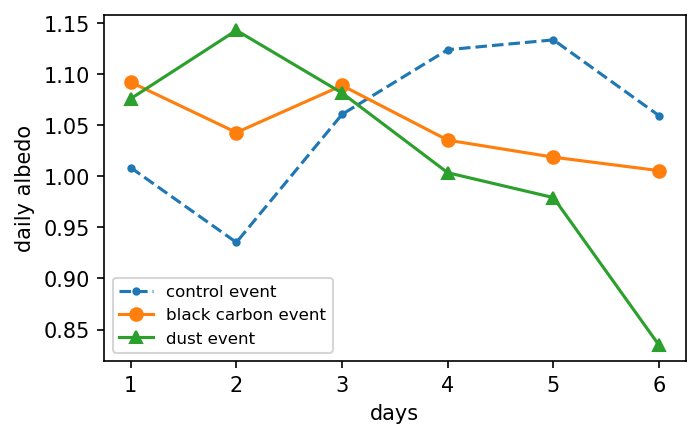

In [225]:
plt.figure(figsize=(5,3), dpi=150)

plt.plot(np.arange(1,7), daily_alb1, '.--', label='control event')
plt.plot(np.arange(1,7), daily_alb2, 'o-', label='black carbon event')
plt.plot(np.arange(1,7), daily_alb3, '^-', label='dust event')

plt.xlabel('days')
plt.ylabel('daily albedo')
plt.legend(fontsize=8)


#### 5.2.1 Load WRF data in January 2022 and April 2023

In [2]:
files_202201 = sorted(glob.glob("/data/home/yxie/wrf_data/jan_2022/*"))
files_202304 = sorted(glob.glob("/data/home/yxie/wrf_data/apr_2023/*"))

In [3]:
# pickd dates for each event: onset and five days after that
files_case1 = files_202201[1:7]    # daily
files_case2 = files_202201[24:30]  # daily
files_case3 = files_202304[8:32]   # every six hours

#### 5.2.2 Visualize WRF snow albedo for the three cases
Case 1: control event - Jan 2-8, 2022   
Case 2: black carbon event - Jan 25-31, 2022   
Case 3: dust event - Apr 3-9, 2023  

In [9]:
dscase1_ini = xr.open_dataset(files_case1[0]).xwrf.postprocess()
dscase1_end = xr.open_dataset(files_case1[-1]).xwrf.postprocess()

dscase2_ini = xr.open_dataset(files_case2[0]).xwrf.postprocess()
dscase2_end = xr.open_dataset(files_case2[-1]).xwrf.postprocess()

# choose 18 PM UTC, which corresponds to 12 PM in local time
dscase3_ini = xr.open_dataset(files_case3[3]).xwrf.postprocess()   
dscase3_end = xr.open_dataset(files_case3[-1]).xwrf.postprocess()

In [114]:
for itt in range(0, len(files_case1) ):
    ds = xr.open_dataset(files_case1[itt]).xwrf.postprocess()
    alb = ds.ALBEDO[:,124, 109].squeeze().values
    time = ds.Time.squeeze().values

    if itt == 0:
        alb1 = alb
        time1 = time
    else:
        alb1 = np.append(alb1, alb)
        time1 = np.append(time1, time) 
    

/tmp/ipykernel_3207/648137882.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, albini.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/648137882.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, albend.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/648137882.py:22: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pl

Text(0.5, 1.0, '(c) Difference')

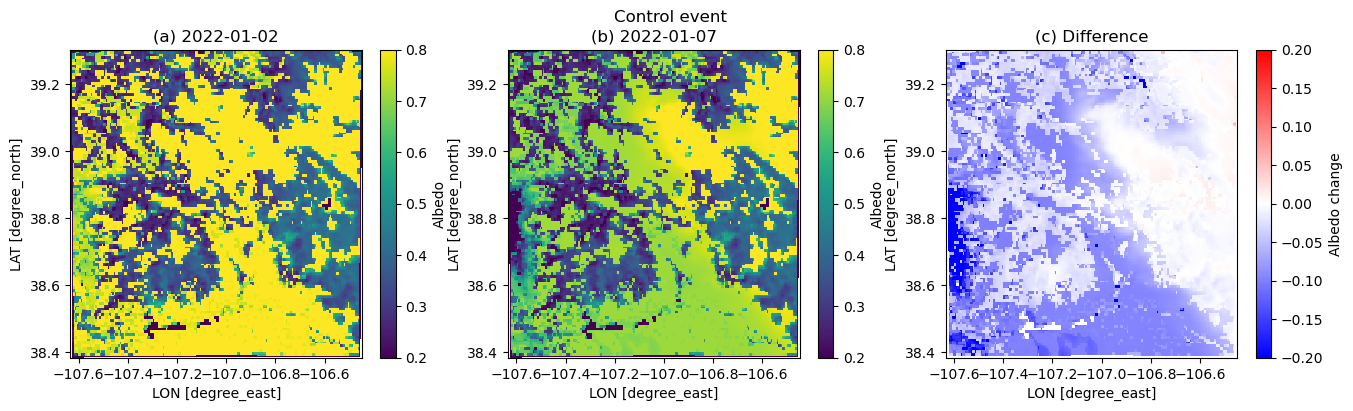

In [18]:
plt.figure(figsize=(16,4))
albini = dscase1_ini.ALBEDO[17,:,:]
albend = dscase1_end.ALBEDO[17,:,:]

plt.suptitle('Control event')

plt.subplot(1,3,1)
plt.pcolormesh(xlong, xlat, albini.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(a) 2022-01-02')

plt.subplot(1,3,2)
plt.pcolormesh(xlong, xlat, albend.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(b) 2022-01-07')

plt.subplot(1,3,3)
plt.pcolormesh(xlong, xlat, albend.squeeze() - albini.squeeze(), cmap=cm.bwr, vmin=-0.2, vmax=0.2)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo change')
plt.title('(c) Difference')

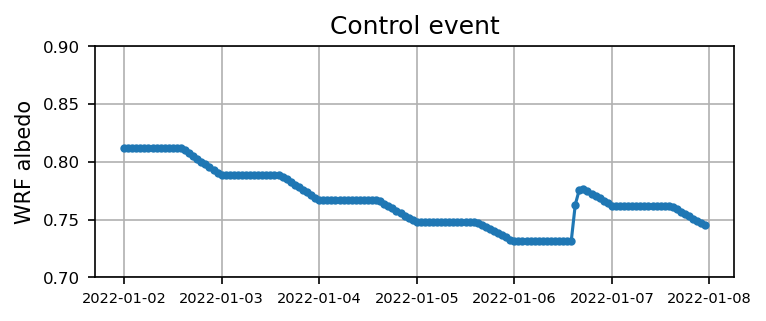

In [115]:
plt.figure(figsize=(5.5,2),dpi=150)
plt.plot(time1, alb1,'.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0.7,0.9,0.05),fontsize=8)
plt.ylabel('WRF albedo')
plt.grid()
plt.title('Control event')
plt.show()

In [116]:
for itt in range(0, len(files_case2) ):
    ds = xr.open_dataset(files_case2[itt]).xwrf.postprocess()
    alb = ds.ALBEDO[:,124,109].squeeze().values
    time = ds.Time.squeeze().values

    if itt == 0:
        alb2 = alb
        time2 = time
    else:
        alb2 = np.append(alb2, alb)
        time2 = np.append(time2, time) 
    

/tmp/ipykernel_3207/78071660.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, albini.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/78071660.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, albend.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/78071660.py:22: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.p

Text(0.5, 1.0, '(c) Difference')

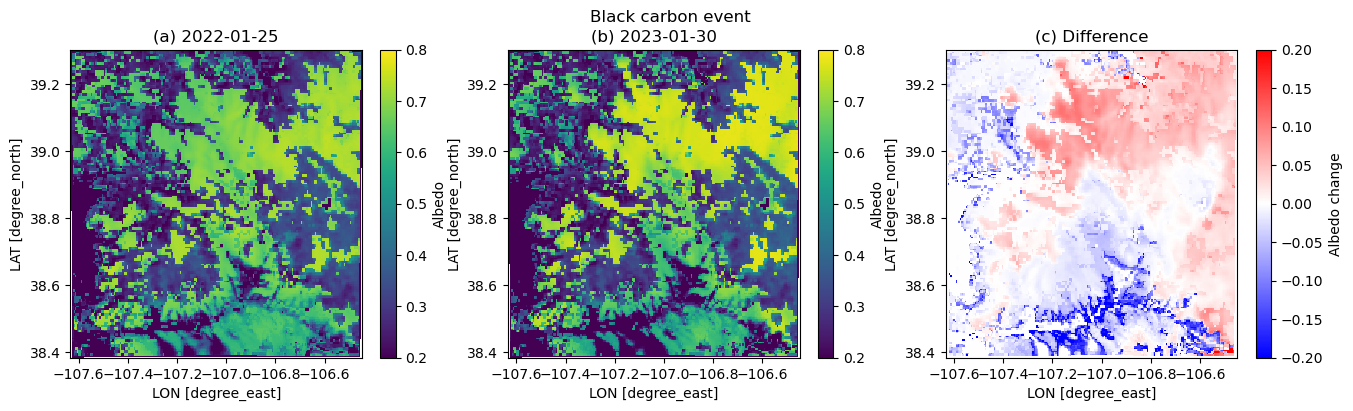

In [19]:
plt.figure(figsize=(16,4))
albini = dscase2_ini.ALBEDO[17,:,:]
albend = dscase2_end.ALBEDO[17,:,:]

plt.suptitle('Black carbon event')

plt.subplot(1,3,1)
plt.pcolormesh(xlong, xlat, albini.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(a) 2022-01-25')

plt.subplot(1,3,2)
plt.pcolormesh(xlong, xlat, albend.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(b) 2023-01-30')

plt.subplot(1,3,3)
plt.pcolormesh(xlong, xlat, albend.squeeze() - albini.squeeze(), cmap=cm.bwr, vmin=-0.2, vmax=0.2)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo change')
plt.title('(c) Difference')

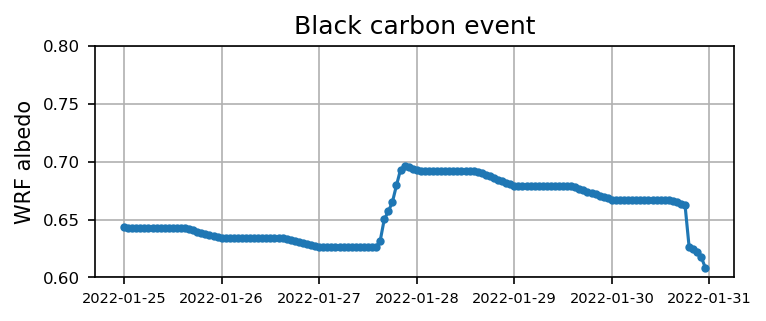

In [117]:
plt.figure(figsize=(5.5,2),dpi=150)
plt.plot(time2, alb2,'.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0.6,0.8,0.05),fontsize=8)
plt.ylabel('WRF albedo')
plt.grid()
plt.title('Black carbon event')
plt.show()

In [118]:
for itt in range(0, len(files_case3) ):
    ds = xr.open_dataset(files_case3[itt]).xwrf.postprocess()
    alb = ds.ALBEDO[:,124,109].squeeze().values
    time = ds.Time.squeeze().values

    if itt == 0:
        alb3 = alb
        time3 = time
    else:
        alb3 = np.append(alb3, alb)
        time3 = np.append(time3, time) 
    

/tmp/ipykernel_3207/964711993.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, dscase3_ini.ALBEDO.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/964711993.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, dscase3_end.ALBEDO.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/964711993.py:20: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell e

Text(0.5, 1.0, '(c) Difference')

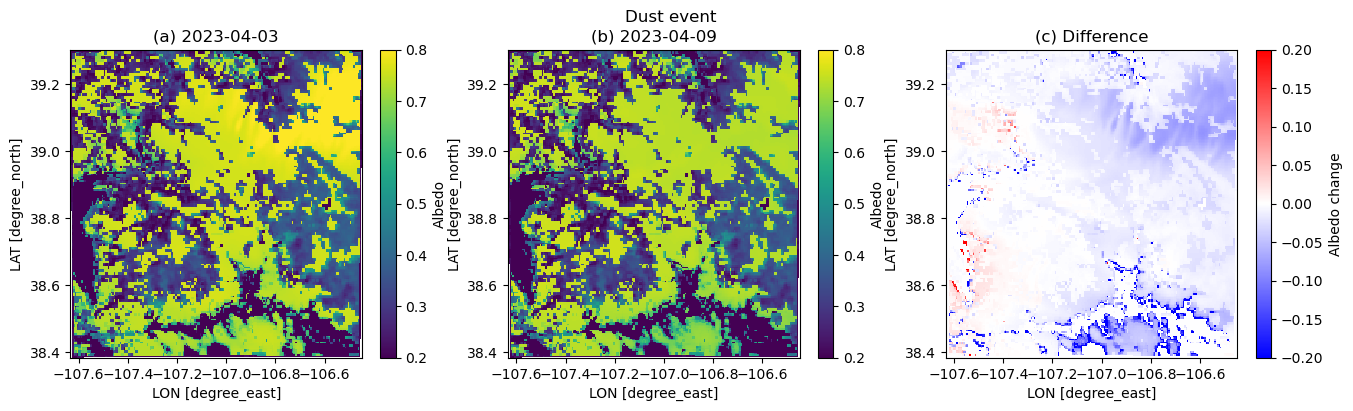

In [20]:
plt.figure(figsize=(16,4))

plt.suptitle('Dust event')

plt.subplot(1,3,1)
plt.pcolormesh(xlong, xlat, dscase3_ini.ALBEDO.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(a) 2023-04-03')

plt.subplot(1,3,2)
plt.pcolormesh(xlong, xlat, dscase3_end.ALBEDO.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(b) 2023-04-09')

plt.subplot(1,3,3)
plt.pcolormesh(xlong, xlat, dscase3_end.ALBEDO.squeeze() - dscase3_ini.ALBEDO.squeeze(), cmap=cm.bwr, vmin=-0.2, vmax=0.2)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo change')
plt.title('(c) Difference')

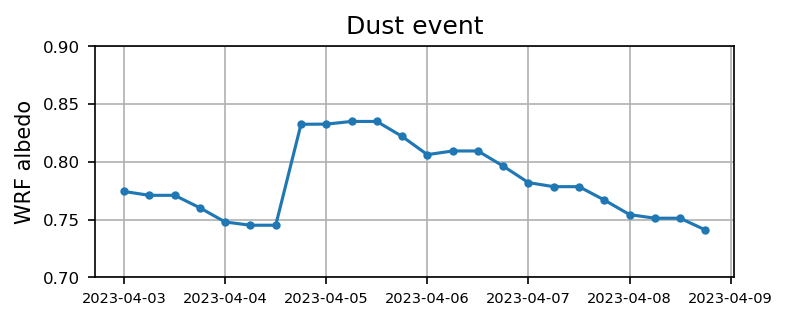

In [120]:
plt.figure(figsize=(5.5,2),dpi=150)
plt.plot(time3, alb3,'.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0.7,0.9,0.05),fontsize=8)
plt.ylabel('WRF albedo')
plt.grid()
plt.title('Dust event')
plt.show()

([<matplotlib.axis.YTick at 0x7f29572e11d0>,
 [Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.7500000000000001, '0.75'),
  Text(0, 0.8000000000000002, '0.80'),
  Text(0, 0.8500000000000002, '0.85'),
  Text(0, 0.9000000000000002, '0.90'),
  Text(0, 0.9500000000000003, '0.95')])

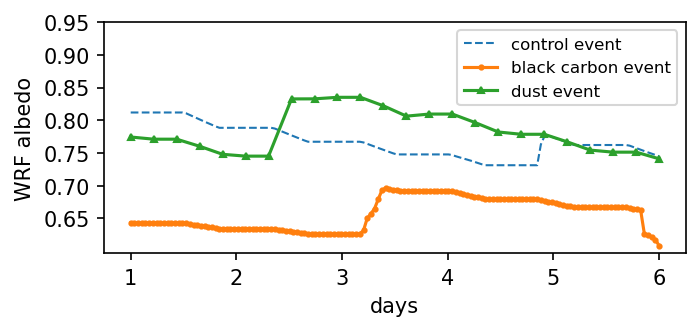

In [121]:
plt.figure(figsize=(5,2), dpi=150)

plt.plot(np.arange(0, alb1.size)/(alb1.size-1)*5 + 1, alb1, '--', linewidth=1, label='control event')
plt.plot(np.arange(0, alb2.size)/(alb2.size-1)*5 + 1, alb2, 'o-', markersize=2, label='black carbon event')
plt.plot(np.arange(0, alb3.size)/(alb3.size-1)*5 + 1, alb3, '^-', markersize=3, label='dust event')

plt.xlabel('days')
plt.ylabel('WRF albedo')
plt.legend(fontsize=8)
plt.yticks(np.arange(0.65, 1.00, 0.05))

## Last Section

If you're comfortable, and as we briefly used for our embedded logo up top, you can embed raw html into Jupyter Markdown cells (edit to see):

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Scary stuff be here.
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!